# Retail Analysis with Walmart Data

DESCRIPTION

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. 
There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. 
The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate 
machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic 
conditions including CPI, Unemployment Index, etc.Walmart runs several promotional markdown events throughout the year. 
These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, 
and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. 
Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the 
absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are 
available.

Dataset Description:-
This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. 
Within this file you will find the following fields:
    
Store - the store number

Date - the week of sales

Weekly_Sales -  sales for the given store

Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

Temperature - Temperature on the day of sale

Fuel_Price - Cost of fuel in the region

CPI – Prevailing consumer price index

Unemployment - Prevailing unemployment rate

Holiday Events:-

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loading Data

In [70]:
df=pd.read_csv("Walmart_Store_sales.csv")

In [3]:
df.shape

(6435, 8)

In [4]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
Store           6435 non-null int64
Date            6435 non-null object
Weekly_Sales    6435 non-null float64
Holiday_Flag    6435 non-null int64
Temperature     6435 non-null float64
Fuel_Price      6435 non-null float64
CPI             6435 non-null float64
Unemployment    6435 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [8]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [9]:
df['Store'].nunique() # Unique stores

45

In [10]:
df.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106


### Analysis Tasks:-

### Which store has maximum sales

In [45]:
store_with_max_sales=list(df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).iloc[:1].index)
print("Store with maximum sales is :- Store No",store_with_max_sales[0])

Store with maximum sales is :- Store No 20


### Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [39]:
store_sales=df.groupby('Store')['Weekly_Sales'].agg([np.min, np.max, np.var, np.std])
store_sales.sort_values(by='std', ascending=False).iloc[:5]

,amin,amax,var,std
Store,,,,
14,1479514.66,3818686.45,1.008507e+11,317569.949476
10,1627707.31,3749057.69,9.136235e+10,302262.062504
20,1761016.51,3766687.43,7.612112e+10,275900.562742
4,1762539.30,3676388.98,7.086321e+10,266201.442297
13,1633663.12,3595903.20,7.049396e+10,265506.995776


In [50]:
# Store 14 has the max std
#coefficient of mean to standard deviation is variance

### Which store/s has good quarterly growth rate in Q3’2012

In [55]:
import datetime

In [72]:
df['Date']=pd.to_datetime(df['Date'])

In [73]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [74]:
df['YYYY-MM']=df['Date'].apply(lambda x: datetime.datetime.strftime(x,'%Y-%m'))

In [75]:
df['YYYY-MM'].unique()

array(['2010-05', '2010-12', '2010-02', '2010-03', '2010-09', '2010-04',
       '2010-07', '2010-11', '2010-06', '2010-08', '2010-10', '2010-01',
       '2011-07', '2011-01', '2011-04', '2011-11', '2011-02', '2011-03',
       '2011-08', '2011-06', '2011-05', '2011-10', '2011-12', '2011-09',
       '2012-06', '2012-01', '2012-03', '2012-10', '2012-02', '2012-09',
       '2012-04', '2012-11', '2012-05', '2012-08', '2012-07', '2012-12'],
      dtype=object)

In [84]:
q3_2012_data=df[df['YYYY-MM'].map(lambda x: x in ('2012-07','2012-08','2012-09'))]

In [89]:
q3_2012_data.groupby('Store')['Weekly_Sales'].agg(np.sum).sort_values(ascending=False).iloc[:1]

Store
4    25652119.35
Name: Weekly_Sales, dtype: float64

In [126]:
# Store 4 has the maximum quarterly growth

### Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [91]:
df.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,YYYY-MM
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010-05
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010-12


In [103]:
# mean sales in non holiday season for all stores together
mean_holiday_sales=df.groupby('Holiday_Flag')['Weekly_Sales'].agg(np.mean).reset_index()
mean_holiday_sales[mean_holiday_sales['Holiday_Flag']==0]

,Holiday_Flag,Weekly_Sales
0,0,1.041256e+06


In [ ]:
# Holidays and sales
# super bowl :- 2010-02

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [180]:
df['Holiday']=np.NAN
superbowl=['2010-12-02','2011-11-02','2012-10-02','2013-08-02']
df.loc[df['Date'].isin(superbowl),'Holiday']='Superbowl'

labourday=['2010-09-10','2011-09-09','2012-09-07','2013-09-06']
df.loc[df['Date'].isin(labourday),'Holiday']='Labourday'

thanksgiving=['2010-11-26','2011-11-25','2012-11-23','2013-11-29']
df.loc[df['Date'].isin(thanksgiving),'Holiday']='Thanksgiving'

xmas=['2010-12-31','2011-12-30','2012-12-28','2013-12-27']
df.loc[df['Date'].isin(xmas),'Holiday']='Xmas'

In [189]:
df.groupby('Holiday')['Weekly_Sales'].agg(np.mean)
# Average sale in thanksgiving and xmas are more than the avg sales of non holiday season

Holiday
Labourday       1.039183e+06
Superbowl       1.079128e+06
Thanksgiving    1.471273e+06
Xmas            9.608331e+05
Name: Weekly_Sales, dtype: float64

### Provide a monthly and semester view of sales in units and give insights

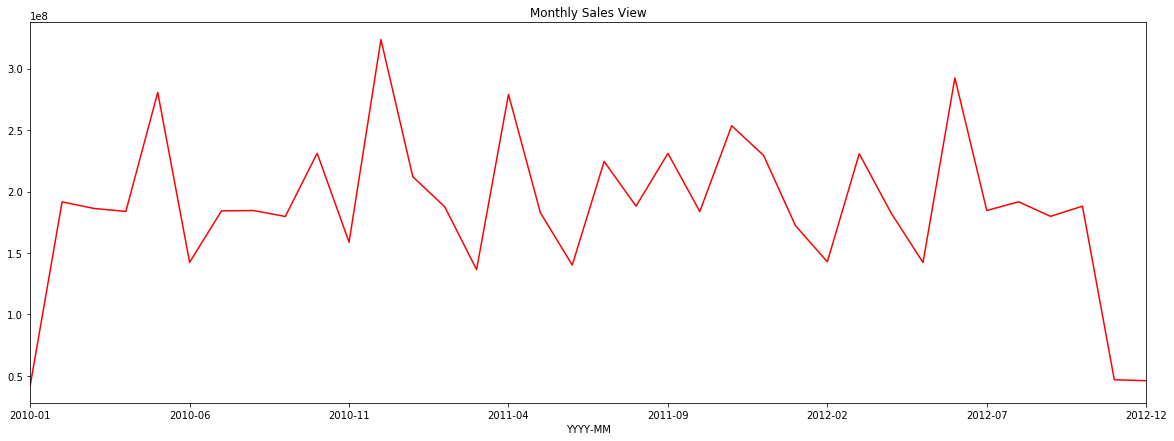

In [197]:
monthly_sales=df.groupby('YYYY-MM')['Weekly_Sales'].sum()
monthly_sales.plot(figsize=(20,7),color='red',title='Monthly Sales View')
plt.show()

### Statistical Model -For Store 1 – Build  prediction models to forecast demand

In [202]:
df_store1_sales=df[df['Store']==1]

In [203]:
df_store1_sales.shape

(143, 10)

Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). 
Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

In [205]:
df_store1_sales.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,YYYY-MM,Holiday
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010-05,NaN
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010-12,Superbowl
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02,NaN
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02,NaN
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010-05,NaN


In [207]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [209]:
x=df_store1_sales[['CPI','Unemployment','Fuel_Price']]
y=df_store1_sales['Weekly_Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [211]:
linereg=LinearRegression()
linereg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [212]:
y_pred=linereg.predict(x_test)

In [213]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE", mean_squared_error(y_test,y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 score", r2_score(y_test,y_pred))


MAE 107174.62471836292
MSE 26168071461.248096
RMSE 161765.48291044074
R2 score 0.009910641913348783


In [216]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [217]:
print("MAPE", mean_absolute_percentage_error(y_test,y_pred))

MAPE 6.349435171858925


In [218]:
from yellowbrick.regressor import ResidualsPlot

In [219]:
resid=y_test-y_pred

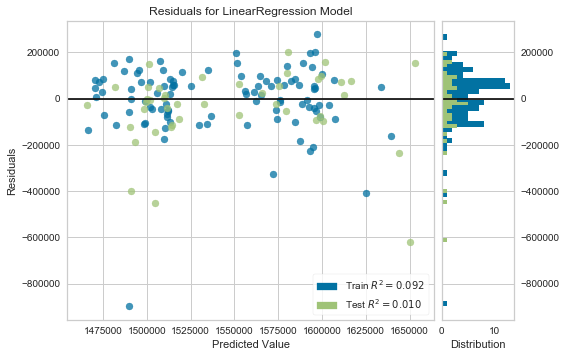

In [221]:
model = ResidualsPlot(linereg)
model.fit(x_train, y_train)
model.score(x_test, y_test)
model.show()

In [222]:
from sklearn.tree import DecisionTreeRegressor

In [223]:
decmod=DecisionTreeRegressor()
decmod.fit(x_train,y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [224]:
y_pred1=decmod.predict(x_test)

In [225]:
print("MAE",mean_absolute_error(y_test,y_pred1))
print("MSE", mean_squared_error(y_test,y_pred1))
print("RMSE", np.sqrt(mean_squared_error(y_test,y_pred1)))
print("R2 score", r2_score(y_test,y_pred1))
print("MAPE", mean_absolute_percentage_error(y_test,y_pred1))

MAE 158820.34
MSE 52071671448.2782
RMSE 228192.18095341962
R2 score -0.9701722320298873
MAPE 9.552613245954591


In [228]:
y_pred1[:10]

array([1352219.79, 1649604.63, 1605491.78, 1422711.6 , 1497954.76,
       2387950.2 , 1603955.12, 2387950.2 , 1534849.64, 1697229.58])

In [229]:
y_test[:10]

78     1624383.75
116    1468928.37
31     1507460.69
5      1439541.59
125    1540421.49
45     1891034.93
14     1494251.50
44     1682614.26
73     1488538.09
89     1502562.78
Name: Weekly_Sales, dtype: float64

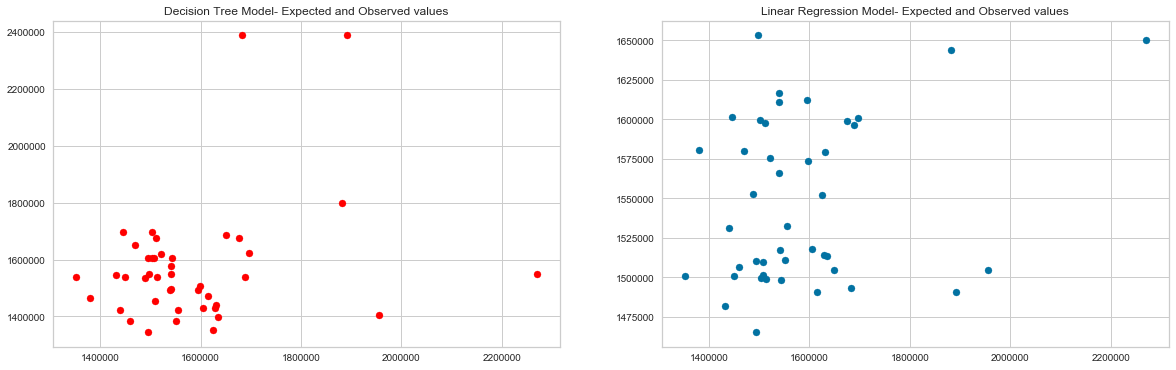

In [248]:
fig, axes=plt.subplots(figsize=(20,6),nrows=1, ncols=2)
axes[0].scatter(y_test,y_pred1, color='red') # Decision tree
axes[0].set_title('Decision Tree Model- Expected and Observed values')
axes[1].scatter(y_test,y_pred)
axes[1].set_title("Linear Regression Model- Expected and Observed values")
plt.show()